y=ax+b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# We set up a random number generator: rng (seeded with a number). 
# Using a seed means we can generate the same sequence of pseudorandom numbers, and so we can check results easily.
rng = np.random.default_rng(20) 

# a and b are coefficients for the line
a = 3
b = -4

# np.linspace(start,stop,number)
X = np.linspace(0, 20, 150) 

# Create data Y using the equation for a line
Y = a*X + b

# Adds Gaussian noise with mean 0 and standard deviation 5 to the data
Y = Y + 5*rng.standard_normal(len(Y))

Text(0, 0.5, 'y')

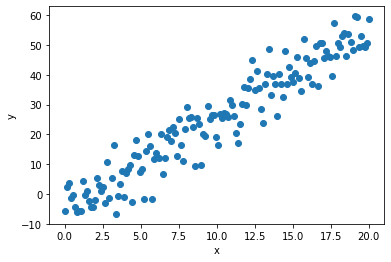

In [16]:
fig, ax = plt.subplots() # This generates us a named figure and axes
ax.scatter(X, Y, label = 'Data') # We generate a scatterplot of the data on the axes.
plt.xlabel('x')
plt.ylabel('y')

Split the data X and targets Y into training and testing sets using the function train_test_split. Set the proportion of the dataset to use as test data to 0.1.

In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.1)

In [5]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
#build regression#

In [6]:
# This reshapes the data to have 1 column and however many rows make sense for the datasklearn    
# 要求输入的特征必须是二维数组的类型，但我们目前特征只有1个，所以需要用reshap(-1,1) 转换成二维数组
Xtrain = Xtrain.reshape(-1, 1)

In [7]:
regr.fit(Xtrain, ytrain) 
# to train the model

LinearRegression()

In [8]:
# see coeff. and intercept
print(regr.coef_)
print(regr.intercept_)

[3.03659828]
-5.088585026441944


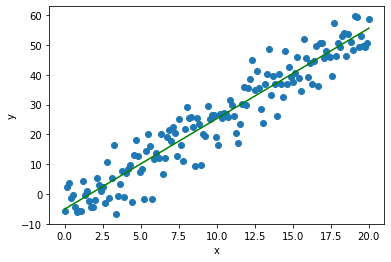

In [9]:
x = np.array([0, 20])
ax.plot(x, regr.coef_[0]*x + regr.intercept_, 'g', label='Fitted model')
fig

In [10]:
# get the predicted y values
Xtest = Xtest.reshape(-1, 1)
ypred = regr.predict(Xtest)

In [11]:
# calculation: mean squared error
def MSE(y, pred):
    dif = y - pred
    sse = (dif**2).sum()
    mse = sse/len(dif)
    return mse

In [12]:
# check
from sklearn.metrics import mean_squared_error
MSE(ytest, ypred) == mean_squared_error(ytest, ypred)

True

In [13]:
# calculating R2
def R2(y, pred):
    sse = ((y-pred)**2).sum()
    d = ((y - np.mean(y))**2).sum()
    return 1 - sse/d

In [14]:
# check
from sklearn.metrics import r2_score
R2(ytest, ypred) == r2_score(ytest, ypred)

True